In [1]:
import matplotlib.pyplot as plt 
import glob
import os
from helpers.labels import get_SpaceElementClasses, get_SpaceFunctionClasses

# ==============================================================================
Author: Amir Ziaee, Georg Suter, Mihael Barada
Copyright: Design Computing Group TU Wien, 2022
Credits: Design Computing Group TU Wien
License: GNU GENERAL PUBLIC LICENSE Version 3
Version: 1.0.1
Maintainer: Amir Ziaee
Email: amir.ziaee@tuwien.ac.at
Status: Prototype
Description: SFS-A68: a dataset for the segmentation of space functions in apartment buildings
Url: https://github.com/A2Amir/SFS-A68
# ==============================================================================


In [8]:
folder_path = 'F:/dcg-drobbox/Code/Dataset/SFS-A68/test_results/UnetTransferLearning'

In [9]:
SEG_CLASSES = get_SpaceFunctionClasses()
for k,item in SEG_CLASSES.items():
    print(item.id, item.name, item.color)

1 DiningRoom (107,74,101)
2 FamilyRoom (166, 206, 227)
3 LivingRoom (242, 0, 192)
4 Bedroom (0, 255, 248)
5 MasterBedroom (0,175,175)
6 BoxRoom (4,72,148)
7 HomeOffice (194, 123, 160)
8 Shaft (253, 237, 0)
9 StorageRoom (255, 182, 0)
10 WalkInCloset (191, 144, 0)
11 Bathroom (255, 0, 0)
12 Toilet (69, 129, 142)
13 Kitchen (131, 126, 197)
14 LaundryRoom (0, 0, 255)
15 Elevator (9, 244, 156)
16 Stairway (168, 134, 113)
17 Entrance (151, 143, 141)
18 Hallway (125, 62, 32)
19 MainHallway (225, 138, 96)
20 InternalHallway (155, 94, 65)
21 AccessBalcony (255, 255, 22)
22 Loggia (121, 56, 145)


In [20]:
img_papths = glob.glob(folder_path + '/**/'+ 'gt_pred_chanenl_6_BoxRoom.jpg', recursive=True) 
img_papths =  sorted(img_papths, key=lambda i: int(os.path.splitext(i.split('\\')[1])[0]))

F:/dcg-drobbox/Code/Dataset/SFS-A68/test_results/UnetTransferLearning\0001\gt_pred_chanenl_6_BoxRoom.jpg


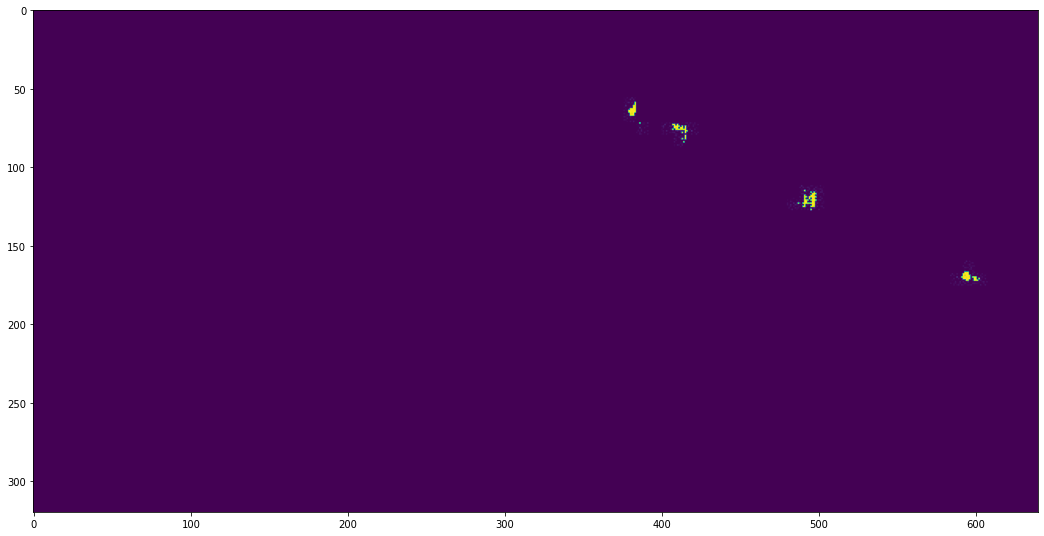

F:/dcg-drobbox/Code/Dataset/SFS-A68/test_results/UnetTransferLearning\0004\gt_pred_chanenl_6_BoxRoom.jpg


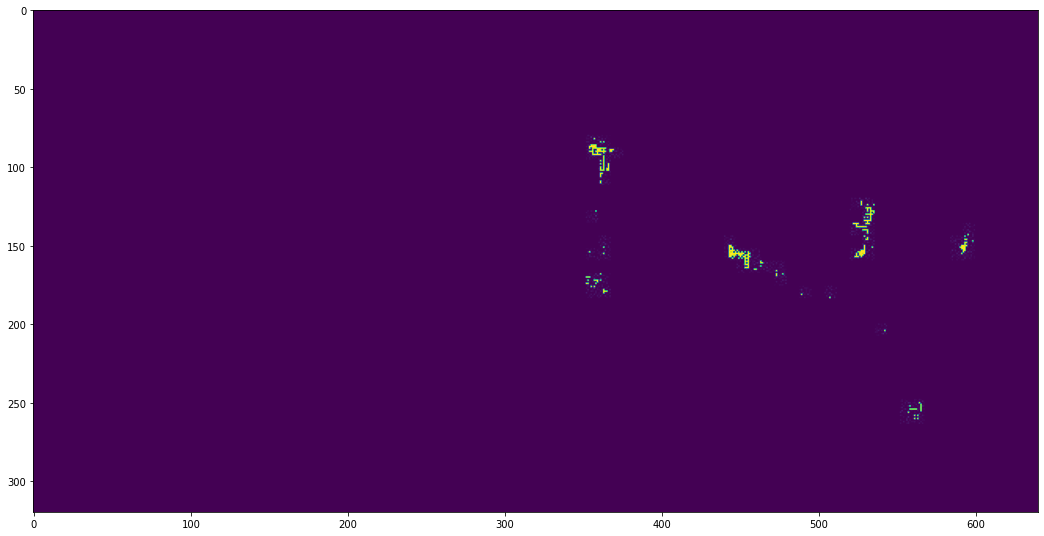

F:/dcg-drobbox/Code/Dataset/SFS-A68/test_results/UnetTransferLearning\0005\gt_pred_chanenl_6_BoxRoom.jpg


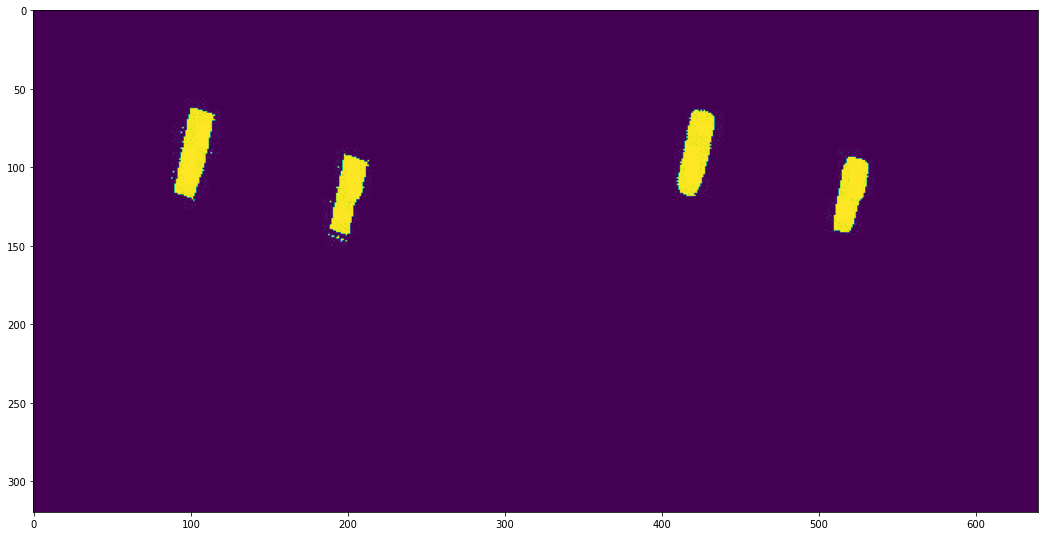

F:/dcg-drobbox/Code/Dataset/SFS-A68/test_results/UnetTransferLearning\0009\gt_pred_chanenl_6_BoxRoom.jpg


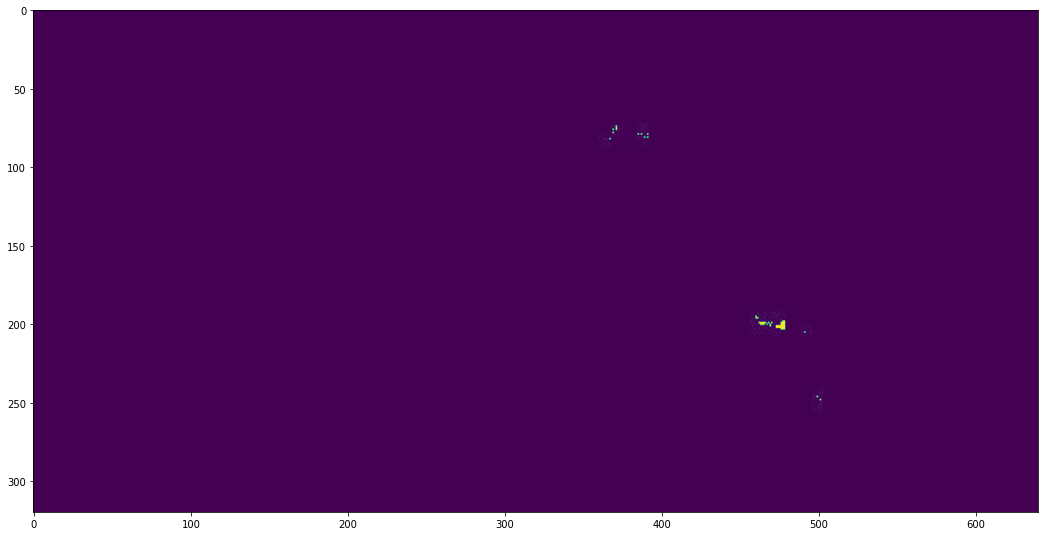

F:/dcg-drobbox/Code/Dataset/SFS-A68/test_results/UnetTransferLearning\0015\gt_pred_chanenl_6_BoxRoom.jpg


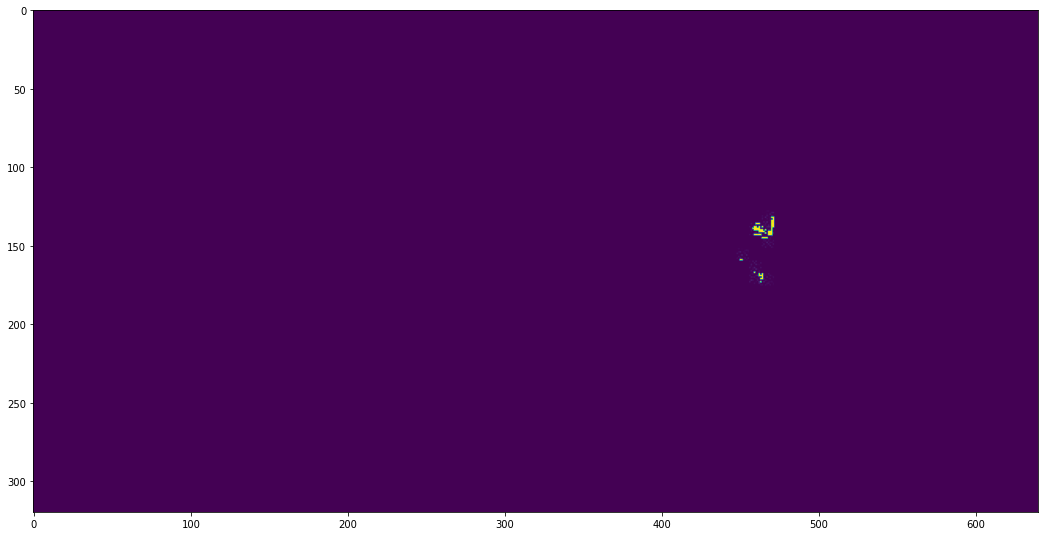

F:/dcg-drobbox/Code/Dataset/SFS-A68/test_results/UnetTransferLearning\0030\gt_pred_chanenl_6_BoxRoom.jpg


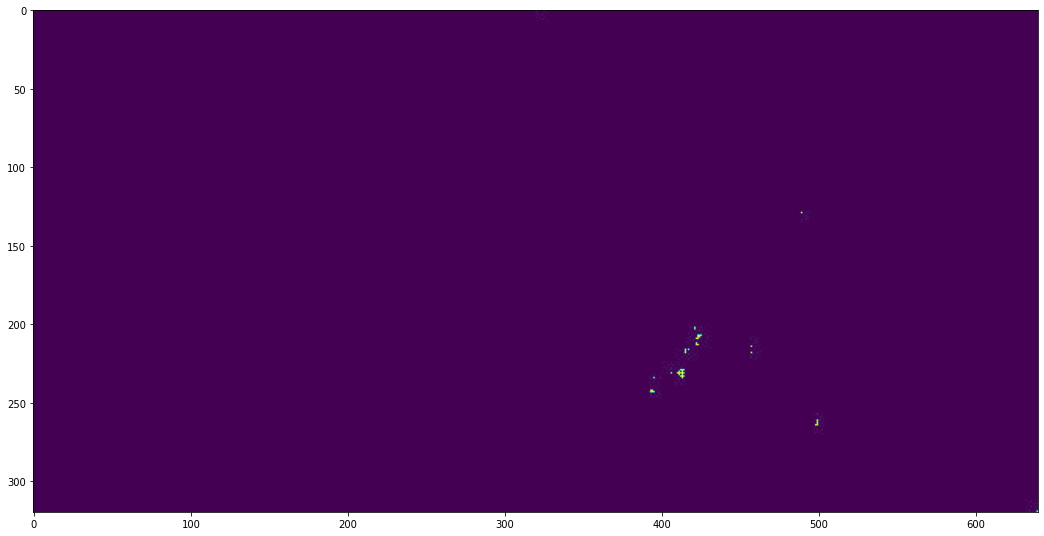

F:/dcg-drobbox/Code/Dataset/SFS-A68/test_results/UnetTransferLearning\0037\gt_pred_chanenl_6_BoxRoom.jpg


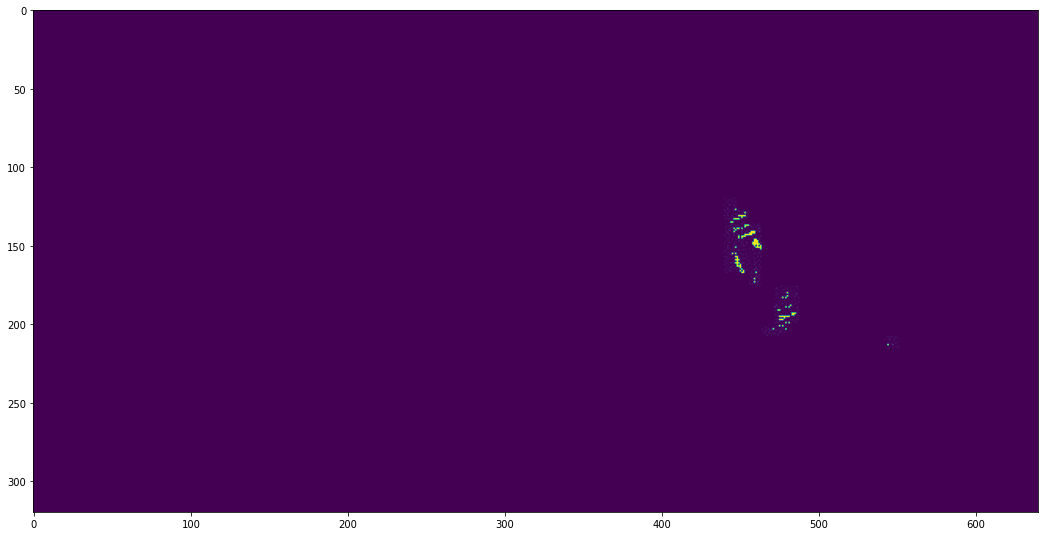

F:/dcg-drobbox/Code/Dataset/SFS-A68/test_results/UnetTransferLearning\0039\gt_pred_chanenl_6_BoxRoom.jpg


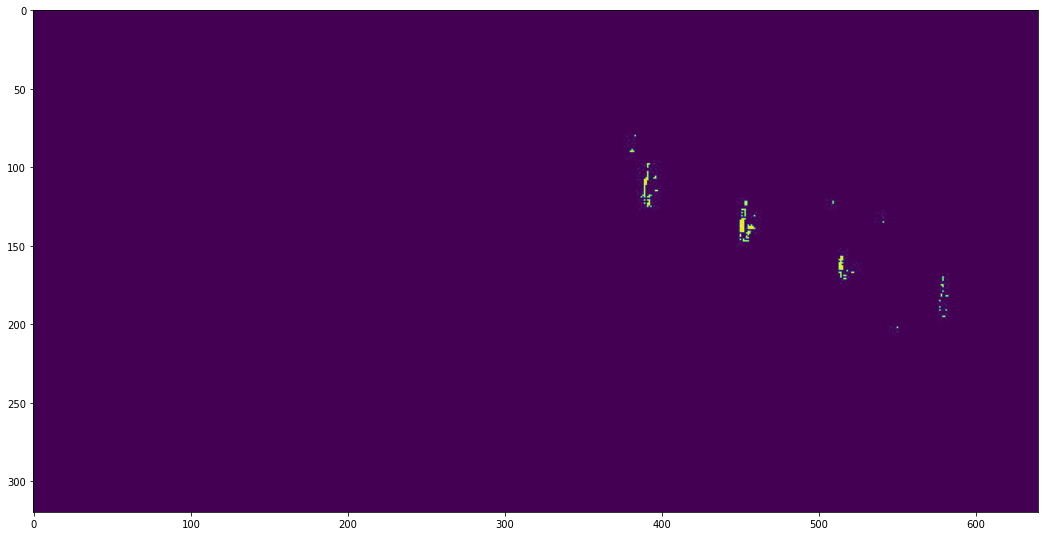

F:/dcg-drobbox/Code/Dataset/SFS-A68/test_results/UnetTransferLearning\0040\gt_pred_chanenl_6_BoxRoom.jpg


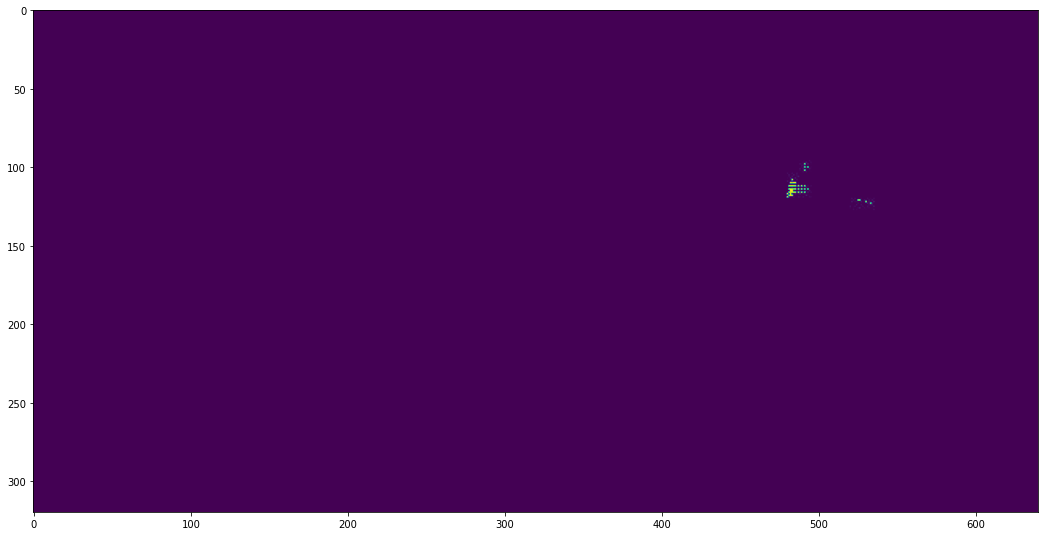

F:/dcg-drobbox/Code/Dataset/SFS-A68/test_results/UnetTransferLearning\0044\gt_pred_chanenl_6_BoxRoom.jpg


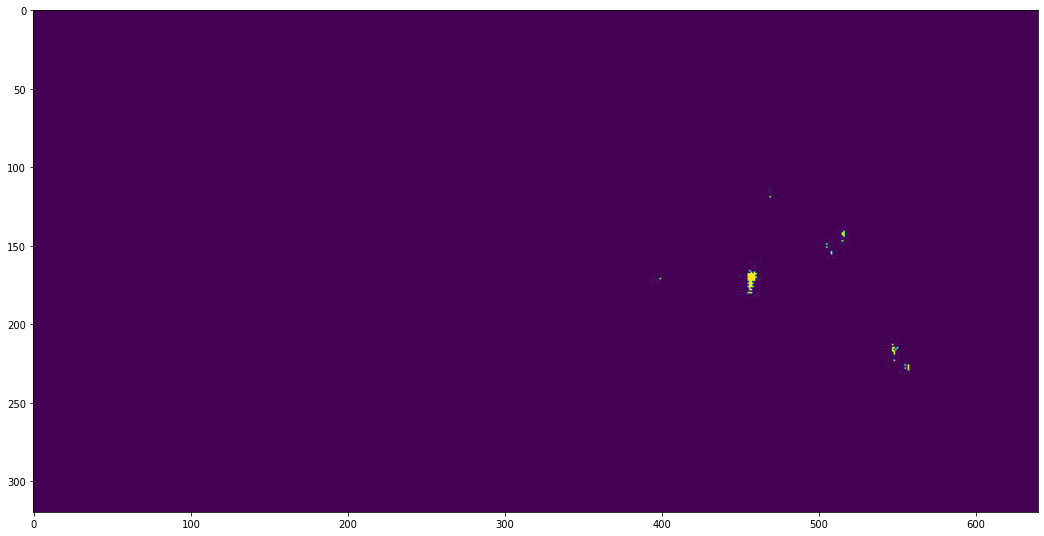

F:/dcg-drobbox/Code/Dataset/SFS-A68/test_results/UnetTransferLearning\0052\gt_pred_chanenl_6_BoxRoom.jpg


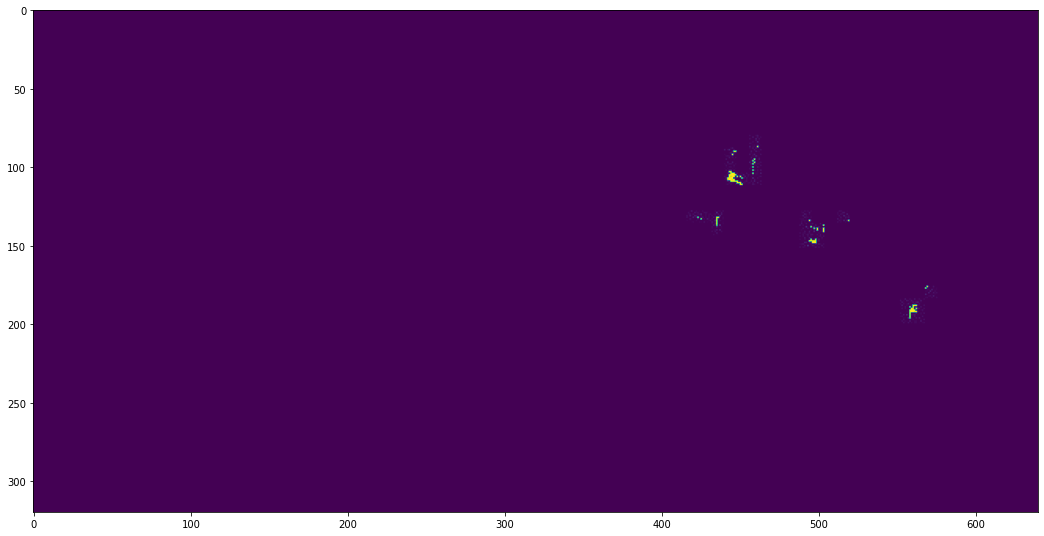

F:/dcg-drobbox/Code/Dataset/SFS-A68/test_results/UnetTransferLearning\0063\gt_pred_chanenl_6_BoxRoom.jpg


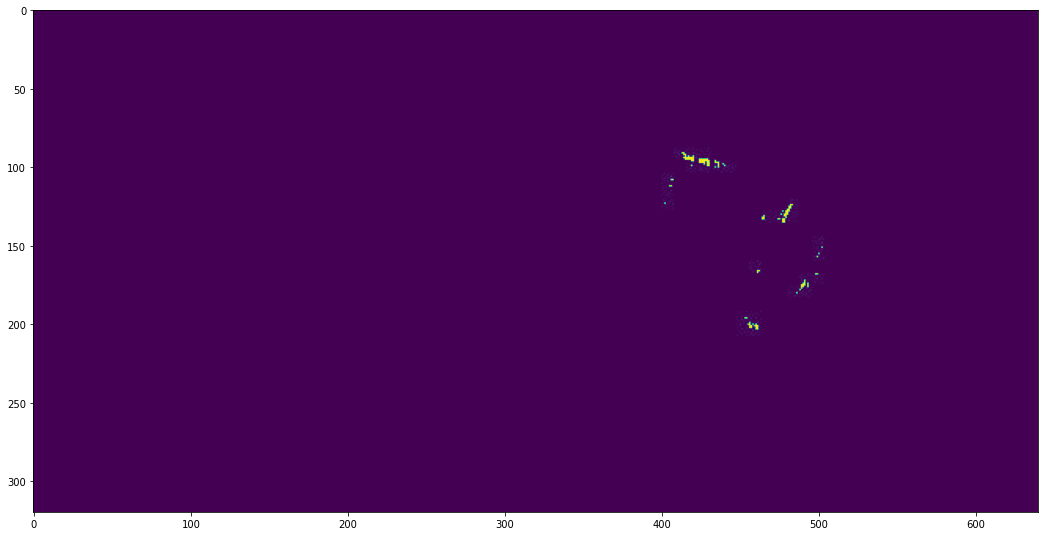

F:/dcg-drobbox/Code/Dataset/SFS-A68/test_results/UnetTransferLearning\0065\gt_pred_chanenl_6_BoxRoom.jpg


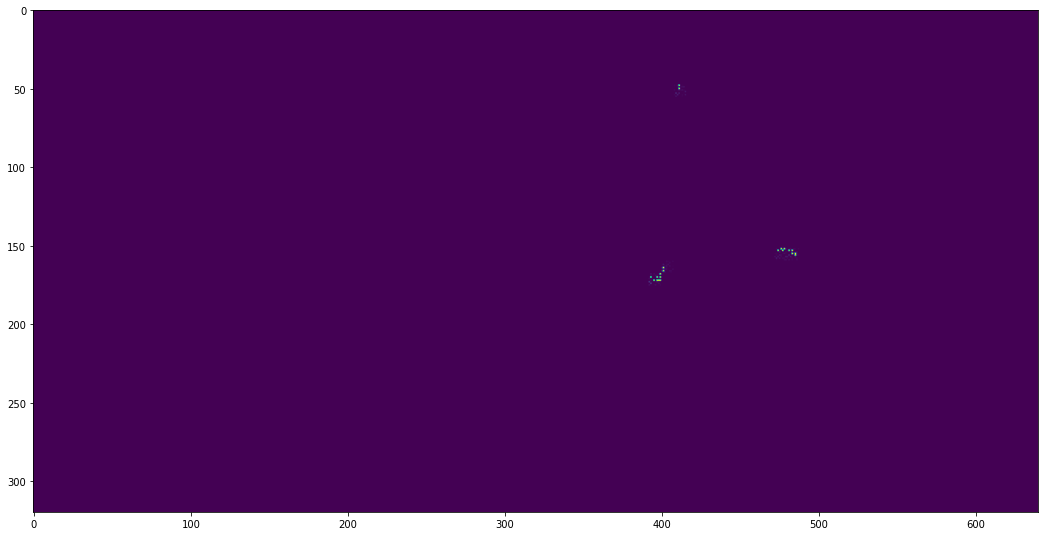

F:/dcg-drobbox/Code/Dataset/SFS-A68/test_results/UnetTransferLearning\0066\gt_pred_chanenl_6_BoxRoom.jpg


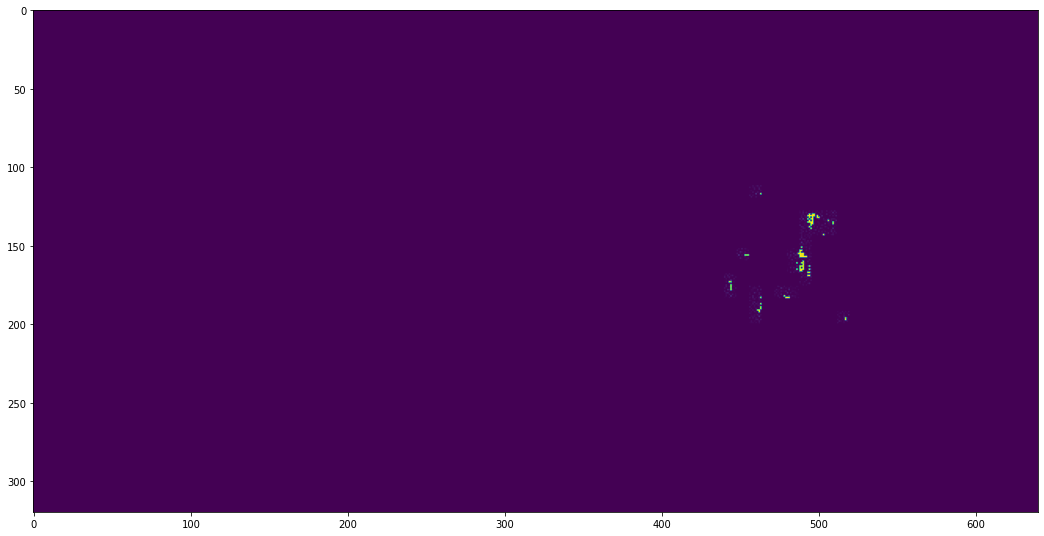

In [21]:
for path in img_papths:
    print(path)
    plt.figure(figsize=(18,18))

    img = plt.imread(path)
    plt.imshow(img)
    plt.show()